# SDGClassifier

In [ ]:
# 데이터 불러오기
import pandas as pd
fish=pd.read_csv('http://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


Species -> target  
나머지 -> input

In [ ]:
# Input & Target
fish_input=fish.drop('Species',axis=1)
fish_target=fish['Species']

   Weight  Length  Diagonal   Height   Width
0   242.0    25.4      30.0  11.5200  4.0200
1   290.0    26.3      31.2  12.4800  4.3056
2   340.0    26.5      31.1  12.3778  4.6961
3   363.0    29.0      33.5  12.7300  4.4555
4   430.0    29.0      34.0  12.4440  5.1340
0    Bream
1    Bream
2    Bream
3    Bream
4    Bream
Name: Species, dtype: object


In [ ]:
# 훈련/테스트 세트
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(fish_input,fish_target,random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((119, 5), (40, 5), (119,), (40,))

In [ ]:
# 표준화 전처리 
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train_scaled=ss.fit_transform(X_train)
X_test_scaled=ss.transform(X_test)

In [ ]:
# 확률적 경사 하강법 
from sklearn.linear_model import SGDClassifier
sc=SGDClassifier(loss='log',max_iter=10,random_state=42)

__SDGClassifier__ : 2개의 매개변수 지정  
+ `loss` : 손실함수  
    + `loss='log'` : 로지스틱 손실함수  
+ `max_iter` : 수행할 epoch 횟수 

In [ ]:
sc.fit(X_train_scaled,y_train)
print(f'훈련세트 점수 : {sc.score(X_train_scaled,y_train)}')
print(f'테스트세트 점수: {sc.score(X_test_scaled,y_test)}')

훈련세트 점수 : 0.773109243697479
테스트세트 점수: 0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [ ]:
# 이어서 모델 훈련하기 
sc.partial_fit(X_train_scaled,y_train)
print(f'훈련세트 점수 : {sc.score(X_train_scaled,y_train)}')
print(f'테스트세트 점수: {sc.score(X_test_scaled,y_test)}')

훈련세트 점수 : 0.8151260504201681
테스트세트 점수: 0.8


# 에포크와 과대/과소적합  
+ 훈련세트 점수 : 에포크가 진행될수록 꾸준히 증가  
+ 테스트세트 점수: 특정 지점부터 감소-> Overfitting! 
    + __조기종료__ : 과대적합이 시작되기 전에 훈련을 먼추는 것  

In [ ]:
import numpy as np
sc=SGDClassifier(loss='log',random_state=42)
train_score=[]
test_score=[]
classes=np.unique(y_train) # partial_fit()메소드로만 모델 학습할때 필요

In [ ]:
for _ in range(300):
    sc.partial_fit(X_train_scaled,y_train,classes=classes)
    train_score.append(sc.score(X_train_scaled,y_train))
    test_score.append(sc.score(X_test_scaled,y_test))

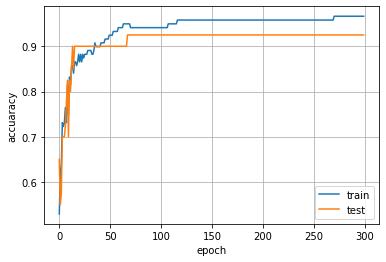

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuaracy')
plt.legend(['train','test'])
plt.grid()
plt.show()

In [ ]:
sc=SGDClassifier(loss='log',max_iter=100,tol=None,random_state=42)
sc.fit(X_train_scaled,y_train)
print(f'훈련세트 점수 : {sc.score(X_train_scaled,y_train)}')
print(f'테스트세트 점수: {sc.score(X_test_scaled,y_test)}')

훈련세트 점수 : 0.957983193277311
테스트세트 점수: 0.925
